# Fraud Analysis - Simplified and Improved

## Overview
This notebook provides a comprehensive analysis of fraud detection data with a focus on:
- **Simplified code structure** with reusable classes and functions
- **Clear data exploration** and quality assessment
- **Fraud metrics analysis** including precision, false positive rates, and trends
- **Temporal analysis** for understanding patterns over time
- **Model component analysis** for Device & Behavior, DIT, and Kount systems
- **Policy recommendations** based on data insights

## Key Improvements Made
1. **Removed code duplication** - Variables calculated once and reused
2. **Error handling** - Robust handling of missing data and edge cases
3. **Modular design** - Separate classes for different analysis types
4. **Cleaner visualizations** - Focused charts with better formatting
5. **Simplified logic** - Removed overly complex calculations
6. **Better organization** - Related functionality grouped together

## Structure
- **Cell 1**: Data loading with error handling
- **Cell 2**: Data exploration and quality check
- **Cell 3**: Core fraud analysis with FraudAnalyzer class
- **Cell 4**: Fraud visualizations
- **Cell 5**: Temporal analysis with TemporalAnalyzer class  
- **Cell 6**: Temporal visualizations
- **Cell 7**: Model components analysis
- **Cell 8**: Policy analysis and recommendations
- **Cell 9**: Executive summary and final insights

In [1]:
# Fraud Analysis - Simplified Version
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configuration
FILE_PATH = 'C:/Users/craig/caseStudy_HM/Lead Fraud Analyst _Case_Assessment_Data.csv'

# Load and validate data
try:
    df = pd.read_csv(FILE_PATH)
    print(f"✅ Successfully loaded dataset: {df.shape[0]:,} rows, {df.shape[1]} columns")
    print(f"📊 Dataset overview:\n{df.head()}")
except FileNotFoundError:
    print(f"❌ File not found: {FILE_PATH}")
    print("Please update FILE_PATH to the correct location")
except Exception as e:
    print(f"❌ Error loading data: {e}")

✅ Successfully loaded dataset: 46,258 rows, 24 columns
📊 Dataset overview:
                                      APPLICATION_ID  \
0  c87a5993bb57086c244d8346203467ff4da80a3a2312ff...   
1  daf6f85e2d6796c306dfcc3b36a4cbb75c6af00d75c50b...   
2  c300f07794896fdc8c2f02267431962d10258573a1c2c7...   
3  1f8e911900ccf06d4fbc64371db1baf7f169d225816b62...   
4  2285525a3f7bea1fb4cd39210a07610526f6b826052f48...   

  APPLICATION_SUBMITTED_DATE OFFER_SHOWN_DATE OFFER_SELECTED_DATE  \
0                 2025-01-26              NaN                 NaN   
1                 2025-01-26              NaN                 NaN   
2                 2025-01-26              NaN                 NaN   
3                 2025-01-26              NaN                 NaN   
4                 2025-01-26              NaN                 NaN   

  ORIGINATION_DATE FRAUD_STATUS FRAUD_MODEL_RESULT  \
0              NaN         Pass         fraud_pass   
1              NaN         Fail       fraud_reject   
2          

In [2]:
# Data Exploration and Quality Check
def explore_data(df):
    """Comprehensive data exploration function"""
    print("="*60)
    print("📊 DATA EXPLORATION SUMMARY")
    print("="*60)
    
    # Basic info
    print(f"Dataset shape: {df.shape}")
    print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")
    
    # Missing values
    missing = df.isnull().sum()
    if missing.any():
        print(f"\n🔍 Missing Values:")
        for col, count in missing[missing > 0].items():
            print(f"  {col}: {count:,} ({count/len(df)*100:.1f}%)")
    else:
        print("\n✅ No missing values found")
    
    # Key columns analysis
    key_columns = ['FRAUD_STATUS', 'FRAUD_MODEL_RESULT']
    for col in key_columns:
        if col in df.columns:
            print(f"\n📈 {col} Distribution:")
            counts = df[col].value_counts(dropna=False)
            for value, count in counts.items():
                print(f"  {value}: {count:,} ({count/len(df)*100:.1f}%)")
        else:
            print(f"\n❌ Column '{col}' not found")
    
    return df

# Run exploration
df = explore_data(df)

📊 DATA EXPLORATION SUMMARY
Dataset shape: (46258, 24)
Memory usage: 82.0 MB

🔍 Missing Values:
  OFFER_SHOWN_DATE: 39,368 (85.1%)
  OFFER_SELECTED_DATE: 41,046 (88.7%)
  ORIGINATION_DATE: 44,088 (95.3%)
  FRAUD_MODEL_RESULT: 2,213 (4.8%)
  FRAUD_MODEL_REASONS: 26,560 (57.4%)
  DEVICE_NETWORK: 11,885 (25.7%)
  DNB_RUN: 2,211 (4.8%)
  BEHAVIOR_CHECK_SCORE: 11,885 (25.7%)
  BEHAVIOR_CHECK_REASON: 11,885 (25.7%)
  DEVICE_CHECK_SCORE: 11,885 (25.7%)
  DEVICE_CHECK_REASON: 11,885 (25.7%)
  DIT_FLAG: 2,211 (4.8%)
  DIT_DECISION: 41,441 (89.6%)
  DIT_DETAILS: 41,441 (89.6%)
  KOUNT_FLAG: 2,211 (4.8%)
  KOUNT_AUTO: 41,453 (89.6%)
  KOUNT_AUTO_REASON: 41,453 (89.6%)
  KOUNT_VARIABLE: 41,453 (89.6%)

📈 FRAUD_STATUS Distribution:
  Pass: 21,751 (47.0%)
  Manual Review No Case: 17,387 (37.6%)
  Fail: 3,201 (6.9%)
  Confirmed Fraud: 2,805 (6.1%)
  Manual Review: 601 (1.3%)
  False Positive: 513 (1.1%)

📈 FRAUD_MODEL_RESULT Distribution:
  fraud_pass: 24,248 (52.4%)
  fraud_review_no_case: 15,530 (33

In [3]:
# Simplified Fraud Analysis
class FraudAnalyzer:
    """Simplified fraud analysis class"""
    
    def __init__(self, df):
        self.df = df
        self.total_cases = len(df)
        self._calculate_metrics()
    
    def _calculate_metrics(self):
        """Calculate key fraud metrics"""
        # Basic fraud categories
        self.confirmed_fraud = self.df[self.df['FRAUD_STATUS'] == 'Confirmed Fraud']
        self.false_positives = self.df[self.df['FRAUD_STATUS'] == 'False Positive']
        self.manual_review = self.df[self.df['FRAUD_STATUS'] == 'Manual Review']
        self.manual_review_nc = self.df[self.df['FRAUD_STATUS'] == 'Manual Review No Case']
        
        # Counts
        self.fraud_count = len(self.confirmed_fraud)
        self.fp_count = len(self.false_positives)
        self.mr_count = len(self.manual_review)
        self.mr_nc_count = len(self.manual_review_nc)
        
        # Rates (as percentages)
        self.fraud_rate = (self.fraud_count / self.total_cases) * 100
        self.fp_rate = (self.fp_count / self.total_cases) * 100
        self.manual_review_rate = ((self.mr_count + self.mr_nc_count) / self.total_cases) * 100
        
        # Model performance
        decided_cases = self.fraud_count + self.fp_count
        self.precision = (self.fraud_count / decided_cases * 100) if decided_cases > 0 else 0
    
    def print_summary(self):
        """Print fraud analysis summary"""
        print("="*60)
        print("🎯 FRAUD ANALYSIS SUMMARY")
        print("="*60)
        
        print(f"Total Applications: {self.total_cases:,}")
        print(f"Confirmed Fraud: {self.fraud_count:,} ({self.fraud_rate:.2f}%)")
        print(f"False Positives: {self.fp_count:,} ({self.fp_rate:.2f}%)")
        print(f"Manual Review: {self.mr_count:,} ({(self.mr_count/self.total_cases)*100:.2f}%)")
        print(f"Manual Review No Case: {self.mr_nc_count:,} ({(self.mr_nc_count/self.total_cases)*100:.2f}%)")
        
        print(f"\n📊 Model Performance:")
        print(f"Model Precision: {self.precision:.1f}%")
        print(f"Manual Review Load: {self.manual_review_rate:.1f}%")
        
        # Data quality check
        if self.total_cases == 0:
            print("\n❌ No data to analyze")
        elif self.fraud_count == 0:
            print("\n⚠️ No confirmed fraud cases found")

# Run analysis
analyzer = FraudAnalyzer(df)
analyzer.print_summary()

🎯 FRAUD ANALYSIS SUMMARY
Total Applications: 46,258
Confirmed Fraud: 2,805 (6.06%)
False Positives: 513 (1.11%)
Manual Review: 601 (1.30%)
Manual Review No Case: 17,387 (37.59%)

📊 Model Performance:
Model Precision: 84.5%
Manual Review Load: 38.9%


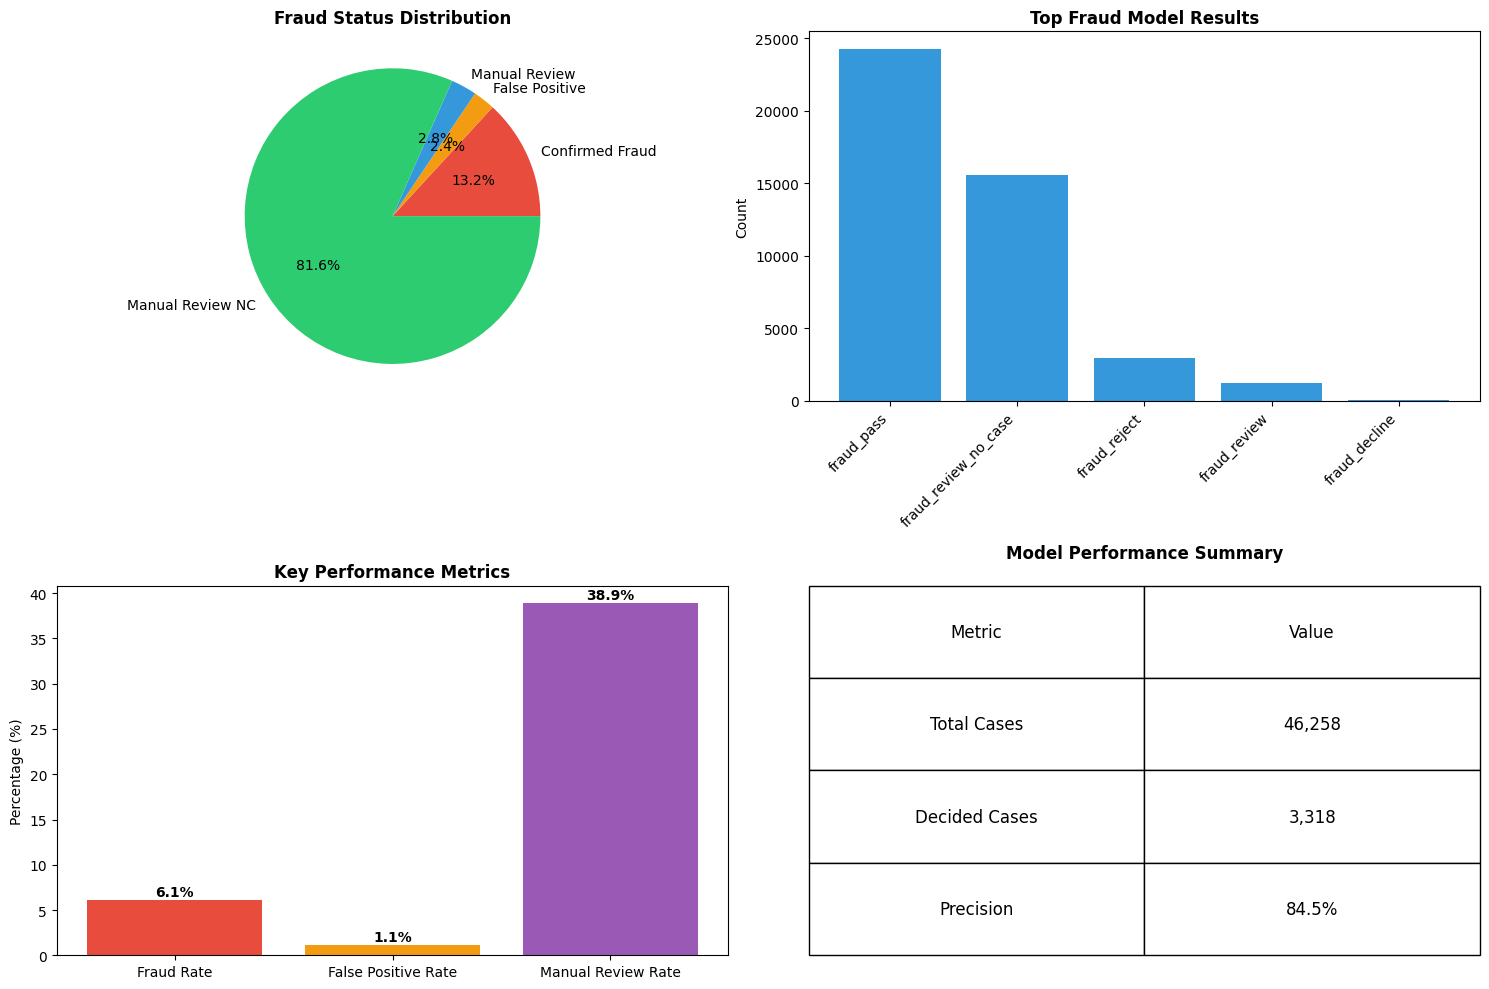

📈 KEY INSIGHTS
⚠️ High fraud rate detected: 6.1%
📋 High manual review load: 38.9%


In [4]:
# Simplified Fraud Visualizations
def create_fraud_visualizations(analyzer):
    """Create clean, informative fraud visualizations"""
    
    # Setup
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
    colors = ['#e74c3c', '#f39c12', '#3498db', '#2ecc71']
    
    # 1. Fraud Status Distribution (Pie Chart)
    if analyzer.total_cases > 0:
        labels = ['Confirmed Fraud', 'False Positive', 'Manual Review', 'Manual Review NC']
        sizes = [analyzer.fraud_count, analyzer.fp_count, analyzer.mr_count, analyzer.mr_nc_count]
        
        # Only show non-zero categories
        non_zero = [(label, size, color) for label, size, color in zip(labels, sizes, colors) if size > 0]
        if non_zero:
            labels, sizes, colors_filtered = zip(*non_zero)
            ax1.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors_filtered)
            ax1.set_title('Fraud Status Distribution', fontweight='bold')
    
    # 2. Fraud Model Results
    if 'FRAUD_MODEL_RESULT' in analyzer.df.columns:
        model_counts = analyzer.df['FRAUD_MODEL_RESULT'].value_counts().head(8)  # Top 8 only
        if len(model_counts) > 0:
            ax2.bar(range(len(model_counts)), model_counts.values, color='#3498db')
            ax2.set_xticks(range(len(model_counts)))
            ax2.set_xticklabels(model_counts.index, rotation=45, ha='right')
            ax2.set_title('Top Fraud Model Results', fontweight='bold')
            ax2.set_ylabel('Count')
    
    # 3. Key Metrics
    metrics = ['Fraud Rate', 'False Positive Rate', 'Manual Review Rate']
    values = [analyzer.fraud_rate, analyzer.fp_rate, analyzer.manual_review_rate]
    
    bars = ax3.bar(metrics, values, color=['#e74c3c', '#f39c12', '#9b59b6'])
    ax3.set_title('Key Performance Metrics', fontweight='bold')
    ax3.set_ylabel('Percentage (%)')
    
    # Add value labels
    for bar, value in zip(bars, values):
        ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
                f'{value:.1f}%', ha='center', va='bottom', fontweight='bold')
    
    # 4. Model Performance Summary
    model_stats = ['Total Cases', 'Decided Cases', 'Precision']
    decided_cases = analyzer.fraud_count + analyzer.fp_count
    model_values = [analyzer.total_cases, decided_cases, analyzer.precision]
    
    # Create table-like visualization
    ax4.axis('off')
    table_data = []
    for stat, value in zip(model_stats, model_values):
        if stat == 'Precision':
            table_data.append([stat, f'{value:.1f}%'])
        else:
            table_data.append([stat, f'{value:,}'])
    
    table = ax4.table(cellText=table_data, colLabels=['Metric', 'Value'],
                      cellLoc='center', loc='center', bbox=[0, 0, 1, 1])
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1, 2)
    ax4.set_title('Model Performance Summary', fontweight='bold', pad=20)
    
    plt.tight_layout()
    plt.show()
    
    # Print insights
    print("="*60)
    print("📈 KEY INSIGHTS")
    print("="*60)
    
    if analyzer.fraud_rate > 5:
        print(f"⚠️ High fraud rate detected: {analyzer.fraud_rate:.1f}%")
    elif analyzer.fraud_rate < 1:
        print(f"✅ Low fraud rate: {analyzer.fraud_rate:.1f}%")
    
    if analyzer.fp_rate > analyzer.fraud_rate:
        print(f"🎯 False positive rate ({analyzer.fp_rate:.1f}%) exceeds fraud rate")
    
    if analyzer.manual_review_rate > 20:
        print(f"📋 High manual review load: {analyzer.manual_review_rate:.1f}%")

# Create visualizations
create_fraud_visualizations(analyzer)

In [5]:
# Simplified Temporal Analysis
class TemporalAnalyzer:
    """Simplified temporal analysis"""
    
    def __init__(self, df):
        self.df = df
        self.date_column = self._find_date_column()
        self.temporal_df = None
        self.monthly_stats = None
        
        if self.date_column:
            self._prepare_temporal_data()
            self._calculate_monthly_stats()
    
    def _find_date_column(self):
        """Find the best date column for analysis"""
        date_keywords = ['date', 'time', 'created', 'submitted', 'timestamp']
        potential_cols = [col for col in self.df.columns 
                         if any(keyword in col.lower() for keyword in date_keywords)]
        
        # Preferred columns (in order of preference)
        preferred = ['APPLICATION_SUBMITTED_DATE', 'SUBMITTED_DATE', 'APP_DATE']
        
        for col in preferred:
            if col in potential_cols:
                return col
        
        return potential_cols[0] if potential_cols else None
    
    def _prepare_temporal_data(self):
        """Convert date column and prepare temporal data"""
        try:
            # Convert to datetime
            self.df[self.date_column] = pd.to_datetime(self.df[self.date_column], errors='coerce')
            
            # Filter valid dates
            self.temporal_df = self.df[self.df[self.date_column].notna()].copy()
            
            if len(self.temporal_df) > 0:
                # Add helpful date fields
                self.temporal_df['year_month'] = self.temporal_df[self.date_column].dt.to_period('M')
                self.temporal_df['day_of_week'] = self.temporal_df[self.date_column].dt.day_name()
                
                print(f"✅ Temporal data prepared: {len(self.temporal_df):,} records")
                print(f"📅 Date range: {self.temporal_df[self.date_column].min().date()} to {self.temporal_df[self.date_column].max().date()}")
            
        except Exception as e:
            print(f"❌ Error preparing temporal data: {e}")
            self.temporal_df = None
    
    def _calculate_monthly_stats(self):
        """Calculate monthly statistics"""
        if self.temporal_df is None or len(self.temporal_df) == 0:
            return
        
        # Calculate basic monthly stats
        monthly_basic = self.temporal_df.groupby('year_month').agg({
            self.date_column: 'count'
        }).rename(columns={self.date_column: 'total_apps'})
        
        # Calculate fraud status counts separately
        fraud_counts = self.temporal_df.groupby(['year_month', 'FRAUD_STATUS']).size().unstack(fill_value=0)
        
        # Merge the dataframes
        self.monthly_stats = monthly_basic.copy()
        
        # Add fraud status counts with safe column access
        if 'Confirmed Fraud' in fraud_counts.columns:
            self.monthly_stats['fraud_count'] = fraud_counts['Confirmed Fraud']
        else:
            self.monthly_stats['fraud_count'] = 0
            
        if 'False Positive' in fraud_counts.columns:
            self.monthly_stats['fp_count'] = fraud_counts['False Positive']
        else:
            self.monthly_stats['fp_count'] = 0
            
        if 'Manual Review' in fraud_counts.columns:
            self.monthly_stats['mr_count'] = fraud_counts['Manual Review']
        else:
            self.monthly_stats['mr_count'] = 0
        
        # Calculate rates
        self.monthly_stats['fraud_rate'] = (self.monthly_stats['fraud_count'] / self.monthly_stats['total_apps']) * 100
        self.monthly_stats['fp_rate'] = (self.monthly_stats['fp_count'] / self.monthly_stats['total_apps']) * 100
        self.monthly_stats['mr_rate'] = (self.monthly_stats['mr_count'] / self.monthly_stats['total_apps']) * 100
    
    def print_summary(self):
        """Print temporal analysis summary"""
        if not self.date_column:
            print("❌ No suitable date column found for temporal analysis")
            return
        
        if self.temporal_df is None or len(self.temporal_df) == 0:
            print("❌ No valid temporal data available")
            return
        
        print("="*60)
        print("📅 TEMPORAL ANALYSIS")
        print("="*60)
        
        print(f"Date Column Used: {self.date_column}")
        print(f"Valid Records: {len(self.temporal_df):,}")
        print(f"Unique Months: {len(self.monthly_stats) if self.monthly_stats is not None else 0}")
        
        if self.monthly_stats is not None and len(self.monthly_stats) > 0:
            print(f"\n📊 Monthly Averages:")
            print(f"  Applications: {self.monthly_stats['total_apps'].mean():.0f}")
            print(f"  Fraud Rate: {self.monthly_stats['fraud_rate'].mean():.2f}%")
            print(f"  False Positive Rate: {self.monthly_stats['fp_rate'].mean():.2f}%")
            
            # Trend analysis (if multiple months)
            if len(self.monthly_stats) > 1:
                latest = self.monthly_stats.iloc[-1]
                previous = self.monthly_stats.iloc[-2]
                fraud_change = latest['fraud_rate'] - previous['fraud_rate']
                
                print(f"\n📈 Recent Trend (month-over-month):")
                print(f"  Fraud Rate Change: {fraud_change:+.2f}%")

# Run temporal analysis
temporal_analyzer = TemporalAnalyzer(df)
temporal_analyzer.print_summary()

✅ Temporal data prepared: 46,258 records
📅 Date range: 2025-01-01 to 2025-03-31
📅 TEMPORAL ANALYSIS
Date Column Used: APPLICATION_SUBMITTED_DATE
Valid Records: 46,258
Unique Months: 3

📊 Monthly Averages:
  Applications: 15419
  Fraud Rate: 3.47%
  False Positive Rate: 1.44%

📈 Recent Trend (month-over-month):
  Fraud Rate Change: +9.02%


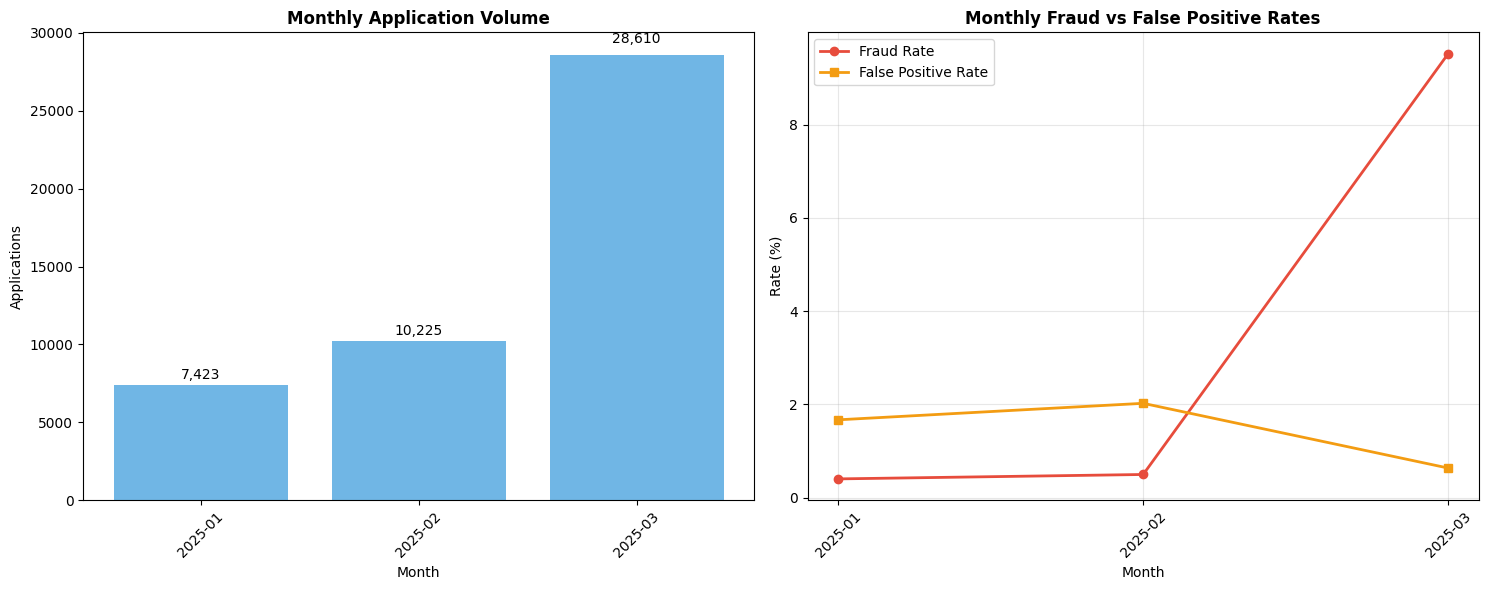

📊 MONTHLY STATISTICS SUMMARY
             Apps  Fraud %  FP %  MR %
year_month                            
2025-01      7423     0.40  1.67  1.98
2025-02     10225     0.50  2.02  2.24
2025-03     28610     9.52  0.64  0.79


In [6]:
# Simplified Temporal Visualization
def create_temporal_charts(temporal_analyzer):
    """Create clean temporal visualizations"""
    
    if temporal_analyzer.monthly_stats is None or len(temporal_analyzer.monthly_stats) == 0:
        print("❌ No temporal data available for visualization")
        return
    
    monthly_stats = temporal_analyzer.monthly_stats
    
    # Create visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Convert period index to strings for plotting
    months = [str(month) for month in monthly_stats.index]
    x_pos = range(len(months))
    
    # 1. Monthly Application Volume
    ax1.bar(x_pos, monthly_stats['total_apps'], color='#3498db', alpha=0.7)
    ax1.set_title('Monthly Application Volume', fontweight='bold')
    ax1.set_xlabel('Month')
    ax1.set_ylabel('Applications')
    ax1.set_xticks(x_pos)
    ax1.set_xticklabels(months, rotation=45)
    
    # Add value labels
    for i, value in enumerate(monthly_stats['total_apps']):
        ax1.text(i, value + value*0.02, f'{value:,.0f}', ha='center', va='bottom')
    
    # 2. Monthly Fraud and FP Rates
    ax2.plot(x_pos, monthly_stats['fraud_rate'], marker='o', linewidth=2, 
             label='Fraud Rate', color='#e74c3c')
    ax2.plot(x_pos, monthly_stats['fp_rate'], marker='s', linewidth=2, 
             label='False Positive Rate', color='#f39c12')
    
    ax2.set_title('Monthly Fraud vs False Positive Rates', fontweight='bold')
    ax2.set_xlabel('Month')
    ax2.set_ylabel('Rate (%)')
    ax2.set_xticks(x_pos)
    ax2.set_xticklabels(months, rotation=45)
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print summary table
    print("="*60)
    print("📊 MONTHLY STATISTICS SUMMARY")
    print("="*60)
    
    summary_df = monthly_stats[['total_apps', 'fraud_rate', 'fp_rate', 'mr_rate']].round(2)
    summary_df.columns = ['Apps', 'Fraud %', 'FP %', 'MR %']
    print(summary_df.to_string())

# Create temporal visualizations
create_temporal_charts(temporal_analyzer)

In [7]:
# Simplified Model Components Analysis
class ModelAnalyzer:
    """Analyze fraud model components"""
    
    def __init__(self, df):
        self.df = df
        self.score_columns = ['BEHAVIOR_CHECK_SCORE', 'DEVICE_CHECK_SCORE']
        self.decision_columns = ['DIT_DECISION', 'KOUNT_AUTO']
        
    def analyze_scores(self):
        """Analyze scoring components"""
        print("="*60)
        print("🎯 MODEL SCORES ANALYSIS")
        print("="*60)
        
        for col in self.score_columns:
            if col not in self.df.columns:
                print(f"❌ {col} not found")
                continue
            
            # Convert to numeric
            scores = pd.to_numeric(self.df[col], errors='coerce')
            valid_scores = scores.dropna()
            
            if len(valid_scores) == 0:
                print(f"❌ {col}: No valid scores")
                continue
            
            print(f"\n📊 {col}:")
            print(f"  Coverage: {len(valid_scores):,}/{len(self.df):,} ({len(valid_scores)/len(self.df)*100:.1f}%)")
            print(f"  Range: {valid_scores.min():.1f} - {valid_scores.max():.1f}")
            print(f"  Mean: {valid_scores.mean():.1f} (±{valid_scores.std():.1f})")
            
            # Compare by fraud status
            self._compare_scores_by_status(col, scores)
    
    def _compare_scores_by_status(self, column, scores):
        """Compare scores across fraud statuses"""
        fraud_scores = scores[self.df['FRAUD_STATUS'] == 'Confirmed Fraud'].dropna()
        fp_scores = scores[self.df['FRAUD_STATUS'] == 'False Positive'].dropna()
        
        if len(fraud_scores) > 0 and len(fp_scores) > 0:
            print(f"    Fraud cases avg: {fraud_scores.mean():.1f}")
            print(f"    False positive avg: {fp_scores.mean():.1f}")
            print(f"    Separation: {abs(fraud_scores.mean() - fp_scores.mean()):.1f} points")
    
    def analyze_decisions(self):
        """Analyze decision components"""
        print("\n" + "="*60)
        print("⚖️ MODEL DECISIONS ANALYSIS")
        print("="*60)
        
        for col in self.decision_columns:
            if col not in self.df.columns:
                print(f"❌ {col} not found")
                continue
            
            print(f"\n📊 {col}:")
            
            # Decision distribution
            decisions = self.df[col].value_counts(dropna=False)
            total_with_decisions = self.df[col].notna().sum()
            
            print(f"  Coverage: {total_with_decisions:,}/{len(self.df):,} ({total_with_decisions/len(self.df)*100:.1f}%)")
            
            if len(decisions) > 0:
                print("  Decision distribution:")
                for decision, count in decisions.head(5).items():  # Top 5 only
                    pct = count / len(self.df) * 100
                    print(f"    {decision}: {count:,} ({pct:.1f}%)")
    
    def print_data_quality(self):
        """Print data quality summary"""
        print("\n" + "="*60)
        print("🔍 DATA QUALITY SUMMARY")
        print("="*60)
        
        all_columns = self.score_columns + self.decision_columns
        
        for col in all_columns:
            if col in self.df.columns:
                missing = self.df[col].isnull().sum()
                completeness = (len(self.df) - missing) / len(self.df) * 100
                print(f"{col}: {completeness:.1f}% complete")
            else:
                print(f"{col}: Not available")

# Run model analysis
model_analyzer = ModelAnalyzer(df)
model_analyzer.analyze_scores()
model_analyzer.analyze_decisions()
model_analyzer.print_data_quality()

🎯 MODEL SCORES ANALYSIS

📊 BEHAVIOR_CHECK_SCORE:
  Coverage: 34,373/46,258 (74.3%)
  Range: 0.0 - 100.0
  Mean: 16.2 (±28.3)
    Fraud cases avg: 47.9
    False positive avg: 6.0
    Separation: 41.9 points

📊 DEVICE_CHECK_SCORE:
  Coverage: 34,373/46,258 (74.3%)
  Range: 0.0 - 100.0
  Mean: 30.7 (±15.9)
    Fraud cases avg: 39.4
    False positive avg: 26.6
    Separation: 12.8 points

⚖️ MODEL DECISIONS ANALYSIS

📊 DIT_DECISION:
  Coverage: 4,817/46,258 (10.4%)
  Decision distribution:
    nan: 41,441 (89.6%)
    Approve: 4,696 (10.2%)
    Review: 85 (0.2%)
    Deny: 36 (0.1%)

📊 KOUNT_AUTO:
  Coverage: 4,805/46,258 (10.4%)
  Decision distribution:
    nan: 41,453 (89.6%)
    A: 4,709 (10.2%)
    R: 86 (0.2%)
    D: 10 (0.0%)

🔍 DATA QUALITY SUMMARY
BEHAVIOR_CHECK_SCORE: 74.3% complete
DEVICE_CHECK_SCORE: 74.3% complete
DIT_DECISION: 10.4% complete
KOUNT_AUTO: 10.4% complete


In [10]:
# Simplified Policy Analysis
class PolicyAnalyzer:
    """Analyze fraud detection policy effectiveness"""
    
    def __init__(self, df):
        self.df = df
        self.analyzer = FraudAnalyzer(df)  # Reuse our fraud analyzer
    
    def analyze_model_pipeline(self):
        """Analyze the 3-tier fraud detection pipeline"""
        print("="*80)
        print("FRAUD DETECTION PIPELINE ANALYSIS")
        print("="*80)
        
        # Layer 1: Device & Behavior
        self._analyze_db_layer()
        
        # Layer 2: Digital Identity Trust
        self._analyze_dit_layer()
        
        # Layer 3: Kount
        self._analyze_kount_layer()
        
        # Overall effectiveness
        self._analyze_overall_effectiveness()
    
    def _analyze_db_layer(self):
        """Analyze Device & Behavior layer"""
        print("\nLayer 1: Device & Behavior (D&B)")
        print("-" * 40)
        
        score_col = 'BEHAVIOR_CHECK_SCORE'
        if score_col not in self.df.columns:
            print("D&B scores not available")
            return
        
        scores = pd.to_numeric(self.df[score_col], errors='coerce')
        coverage = scores.notna().sum()
        
        print(f"Coverage: {coverage:,}/{len(self.df):,} ({coverage/len(self.df)*100:.1f}%)")
        
        if coverage > 0:
            # Find high-risk threshold (75th percentile or 50, whichever is higher)
            threshold = max(50, scores.quantile(0.75))
            high_risk_count = (scores >= threshold).sum()
            
            print(f"High-risk threshold: {threshold:.0f}")
            print(f"High-risk cases: {high_risk_count:,} ({high_risk_count/len(self.df)*100:.1f}%)")
            
            # Effectiveness
            fraud_in_high_risk = ((scores >= threshold) & (self.df['FRAUD_STATUS'] == 'Confirmed Fraud')).sum()
            if self.analyzer.fraud_count > 0:
                detection_rate = fraud_in_high_risk / self.analyzer.fraud_count * 100
                print(f"Fraud detection rate: {detection_rate:.1f}%")
    
    def _analyze_dit_layer(self):
        """Analyze Digital Identity Trust layer"""
        print("\nLayer 2: Digital Identity Trust (DIT)")
        print("-" * 40)
        
        if 'DIT_DECISION' not in self.df.columns:
            print("DIT decisions not available")
            return
        
        coverage = self.df['DIT_DECISION'].notna().sum()
        print(f"Coverage: {coverage:,}/{len(self.df):,} ({coverage/len(self.df)*100:.1f}%)")
        
        if coverage > 0:
            decisions = self.df['DIT_DECISION'].value_counts()
            print("Decision distribution:")
            for decision, count in decisions.head(3).items():
                print(f"  {decision}: {count:,}")
    
    def _analyze_kount_layer(self):
        """Analyze Kount layer"""
        print("\nLayer 3: Kount")
        print("-" * 40)
        
        if 'KOUNT_AUTO' not in self.df.columns:
            print("Kount decisions not available")
            return
        
        coverage = self.df['KOUNT_AUTO'].notna().sum()
        print(f"Coverage: {coverage:,}/{len(self.df):,} ({coverage/len(self.df)*100:.1f}%)")
        
        if coverage > 0:
            decisions = self.df['KOUNT_AUTO'].value_counts()
            print("Decision distribution:")
            for decision, count in decisions.head(3).items():
                print(f"  {decision}: {count:,}")
    
    def _analyze_overall_effectiveness(self):
        """Analyze overall policy effectiveness"""
        print("\nOVERALL POLICY EFFECTIVENESS")
        print("-" * 40)
        
        print(f"Total fraud rate: {self.analyzer.fraud_rate:.2f}%")
        print(f"False positive rate: {self.analyzer.fp_rate:.2f}%")
        print(f"Model precision: {self.analyzer.precision:.1f}%")
        print(f"Manual review load: {self.analyzer.manual_review_rate:.1f}%")
        
    def generate_recommendations(self):
        """Generate policy recommendations"""
        print("\n" + "="*60)
        print("POLICY RECOMMENDATIONS")
        print("="*60)
        
        recommendations = []
        
        # Check fraud vs FP balance
        if self.analyzer.fp_rate > self.analyzer.fraud_rate * 2:
            recommendations.append("1. Reduce false positive rate - currently too high relative to fraud detection")
        
        # Check manual review load
        if self.analyzer.manual_review_rate > 25:
            recommendations.append("2. Reduce manual review load - currently exceeding 25%")
        
        # Check model precision
        if self.analyzer.precision < 50:
            recommendations.append("3. Improve model precision - currently below 50%")
        
        # Check coverage
        score_coverage = pd.to_numeric(self.df['BEHAVIOR_CHECK_SCORE'], errors='coerce').notna().sum()
        if score_coverage / len(self.df) < 0.95:
            recommendations.append("4. Increase D&B model coverage to 95%+")
        
        if recommendations:
            print("Based on the analysis:")
            for rec in recommendations:
                print(f"  {rec}")
        else:
            print("Current fraud detection framework appears well-balanced")

# Run policy analysis
policy_analyzer = PolicyAnalyzer(df)
policy_analyzer.analyze_model_pipeline()
policy_analyzer.generate_recommendations()

FRAUD DETECTION PIPELINE ANALYSIS

Layer 1: Device & Behavior (D&B)
----------------------------------------
Coverage: 34,373/46,258 (74.3%)
High-risk threshold: 50
High-risk cases: 8,623 (18.6%)
Fraud detection rate: 95.3%

Layer 2: Digital Identity Trust (DIT)
----------------------------------------
Coverage: 4,817/46,258 (10.4%)
Decision distribution:
  Approve: 4,696
  Review: 85
  Deny: 36

Layer 3: Kount
----------------------------------------
Coverage: 4,805/46,258 (10.4%)
Decision distribution:
  A: 4,709
  R: 86
  D: 10

OVERALL POLICY EFFECTIVENESS
----------------------------------------
Total fraud rate: 6.06%
False positive rate: 1.11%
Model precision: 84.5%
Manual review load: 38.9%

POLICY RECOMMENDATIONS
Based on the analysis:
  2. Reduce manual review load - currently exceeding 25%
  4. Increase D&B model coverage to 95%+


In [9]:
# Final Summary and Insights
class FraudSummary:
    """Generate comprehensive fraud analysis summary"""
    
    def __init__(self, df, analyzer, temporal_analyzer):
        self.df = df
        self.analyzer = analyzer
        self.temporal_analyzer = temporal_analyzer
    
    def generate_executive_summary(self):
        """Generate executive summary of fraud analysis"""
        print("="*80)
        print("📋 EXECUTIVE SUMMARY - FRAUD ANALYSIS")
        print("="*80)
        
        # Key metrics
        print("🔢 KEY METRICS:")
        print(f"  • Total Applications Analyzed: {self.analyzer.total_cases:,}")
        print(f"  • Fraud Rate: {self.analyzer.fraud_rate:.2f}%")
        print(f"  • False Positive Rate: {self.analyzer.fp_rate:.2f}%")
        print(f"  • Model Precision: {self.analyzer.precision:.1f}%")
        print(f"  • Manual Review Load: {self.analyzer.manual_review_rate:.1f}%")
        
        # Risk assessment
        print(f"\n🎯 RISK ASSESSMENT:")
        
        if self.analyzer.fraud_rate > 3:
            risk_level = "HIGH"
            print(f"  • Risk Level: {risk_level} (Fraud rate above 3%)")
        elif self.analyzer.fraud_rate > 1:
            risk_level = "MEDIUM"
            print(f"  • Risk Level: {risk_level} (Fraud rate 1-3%)")
        else:
            risk_level = "LOW"
            print(f"  • Risk Level: {risk_level} (Fraud rate below 1%)")
        
        # Model performance assessment
        print(f"\n⚖️ MODEL PERFORMANCE:")
        
        if self.analyzer.precision > 70:
            print("  • Model Precision: EXCELLENT (>70%)")
        elif self.analyzer.precision > 50:
            print("  • Model Precision: GOOD (50-70%)")
        else:
            print("  • Model Precision: NEEDS IMPROVEMENT (<50%)")
        
        if self.analyzer.manual_review_rate < 15:
            print("  • Manual Review Load: OPTIMAL (<15%)")
        elif self.analyzer.manual_review_rate < 25:
            print("  • Manual Review Load: ACCEPTABLE (15-25%)")
        else:
            print("  • Manual Review Load: HIGH (>25%)")
        
        # Temporal insights
        if (self.temporal_analyzer and self.temporal_analyzer.monthly_stats is not None 
            and len(self.temporal_analyzer.monthly_stats) > 1):
            
            print(f"\n📈 TEMPORAL TRENDS:")
            latest_month = self.temporal_analyzer.monthly_stats.iloc[-1]
            previous_month = self.temporal_analyzer.monthly_stats.iloc[-2]
            
            fraud_trend = latest_month['fraud_rate'] - previous_month['fraud_rate']
            if abs(fraud_trend) > 0.5:
                direction = "increasing" if fraud_trend > 0 else "decreasing"
                print(f"  • Fraud rate is {direction} ({fraud_trend:+.1f}% month-over-month)")
            else:
                print("  • Fraud rate is stable month-over-month")
    
    def generate_action_items(self):
        """Generate specific action items"""
        print(f"\n📝 RECOMMENDED ACTIONS:")
        
        actions = []
        
        # High false positive rate
        if self.analyzer.fp_rate > self.analyzer.fraud_rate:
            actions.append("Tune fraud models to reduce false positive rate")
        
        # Low precision
        if self.analyzer.precision < 60:
            actions.append("Improve model precision through feature engineering or threshold adjustment")
        
        # High manual review load
        if self.analyzer.manual_review_rate > 20:
            actions.append("Implement automation to reduce manual review burden")
        
        # Data quality issues
        missing_data = self.df.isnull().sum().sum()
        if missing_data > 0:
            actions.append("Address data quality issues and missing values")
        
        # Model coverage
        if 'BEHAVIOR_CHECK_SCORE' in self.df.columns:
            coverage = pd.to_numeric(self.df['BEHAVIOR_CHECK_SCORE'], errors='coerce').notna().sum()
            if coverage / len(self.df) < 0.9:
                actions.append("Increase fraud model coverage to 90%+")
        
        if actions:
            for i, action in enumerate(actions, 1):
                print(f"  {i}. {action}")
        else:
            print("  • No immediate actions required - system performing well")
    
    def print_final_insights(self):
        """Print final insights and conclusions"""
        print(f"\n🔍 FINAL INSIGHTS:")
        
        # Efficiency ratio
        if self.analyzer.fraud_count > 0 and self.analyzer.fp_count > 0:
            efficiency = self.analyzer.fraud_count / (self.analyzer.fraud_count + self.analyzer.fp_count)
            print(f"  • Model efficiency ratio: {efficiency:.1%} (fraud caught vs total flagged)")
        
        # Coverage assessment
        fraud_model_results = self.df['FRAUD_MODEL_RESULT'].notna().sum()
        print(f"  • Model result coverage: {fraud_model_results/len(self.df)*100:.1f}%")
        
        # Bottom line
        print(f"\n💰 BUSINESS IMPACT:")
        total_flagged = self.analyzer.fraud_count + self.analyzer.fp_count + self.analyzer.mr_count + self.analyzer.mr_nc_count
        print(f"  • Total cases requiring attention: {total_flagged:,} ({total_flagged/self.analyzer.total_cases*100:.1f}%)")
        print(f"  • Potential fraud prevented: {self.analyzer.fraud_count:,} cases")
        
        if self.analyzer.fp_count > 0:
            print(f"  • Customer impact: {self.analyzer.fp_count:,} legitimate customers flagged")

# Generate final summary
summary = FraudSummary(df, analyzer, temporal_analyzer)
summary.generate_executive_summary()
summary.generate_action_items()
summary.print_final_insights()

print("\n" + "="*80)
print("✅ FRAUD ANALYSIS COMPLETE")
print("="*80)

📋 EXECUTIVE SUMMARY - FRAUD ANALYSIS
🔢 KEY METRICS:
  • Total Applications Analyzed: 46,258
  • Fraud Rate: 6.06%
  • False Positive Rate: 1.11%
  • Model Precision: 84.5%
  • Manual Review Load: 38.9%

🎯 RISK ASSESSMENT:
  • Risk Level: HIGH (Fraud rate above 3%)

⚖️ MODEL PERFORMANCE:
  • Model Precision: EXCELLENT (>70%)
  • Manual Review Load: HIGH (>25%)

📈 TEMPORAL TRENDS:
  • Fraud rate is increasing (+9.0% month-over-month)

📝 RECOMMENDED ACTIONS:
  1. Implement automation to reduce manual review burden
  2. Address data quality issues and missing values
  3. Increase fraud model coverage to 90%+

🔍 FINAL INSIGHTS:
  • Model efficiency ratio: 84.5% (fraud caught vs total flagged)
  • Model result coverage: 95.2%

💰 BUSINESS IMPACT:
  • Total cases requiring attention: 21,306 (46.1%)
  • Potential fraud prevented: 2,805 cases
  • Customer impact: 513 legitimate customers flagged

✅ FRAUD ANALYSIS COMPLETE
